## Atividade 01 - Parte01 - Inventário de emissões com Python
Alunas: Alice Alegria Ramos e Ana Carolina Carvalho

## Inserindo as bibliotecas utilizadas no código

In [39]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Lendo a planilha com as Emissões da AP-42:

In [28]:
import pandas as pd
import os

# Coletando o caminho da pasta atual
cwd = os.getcwd()

# Pasta dos fatores de emissão
path = os.path.join(cwd, 'tabelas\\FE')
print(path)

# Indicando o nome do arquivo
chapterNumer = 10
supChapter = 62
file = f'chpt_{chapterNumer}_{supChapter}.csv'
print(file)

# Abrindo o arquivo com o pandas
caminho_arquivo = os.path.join(path, file)
fe = pd.read_csv(caminho_arquivo)
print(fe)

C:\Users\alice\OneDrive\Área de Trabalho\UFSC 24.1\Poluicao\ENS51732401\tabelas\FE
chpt_10_62.csv
     Source    Nox    CO    CO2
0     RDDWH  0.460  2.85    0.0
1     RDDWS  0.290  0.34    0.0
2     RDDWM  0.900  0.29  269.0
3    RDGDWS  1.350  1.75  286.5
4    RDGDWM  0.700  0.38    0.0
5      RDNH  0.012  0.60  155.5
6     RDGNS  0.000  0.00  118.5
7  RDIHANGS  0.150  0.06   19.1
8  TDWB-UFH  0.000  0.00  223.5


## Gerando Gráficos dos Fatores de Emissão

Source    RDDWHRDDWHRDDWHRDDWHRDDWHRDDWHRDDWHRDDWHRDDWHR...
Nox                                                7808.964
CO                                                 12677.94
CO2                                               2167786.2
dtype: object
1
2
3


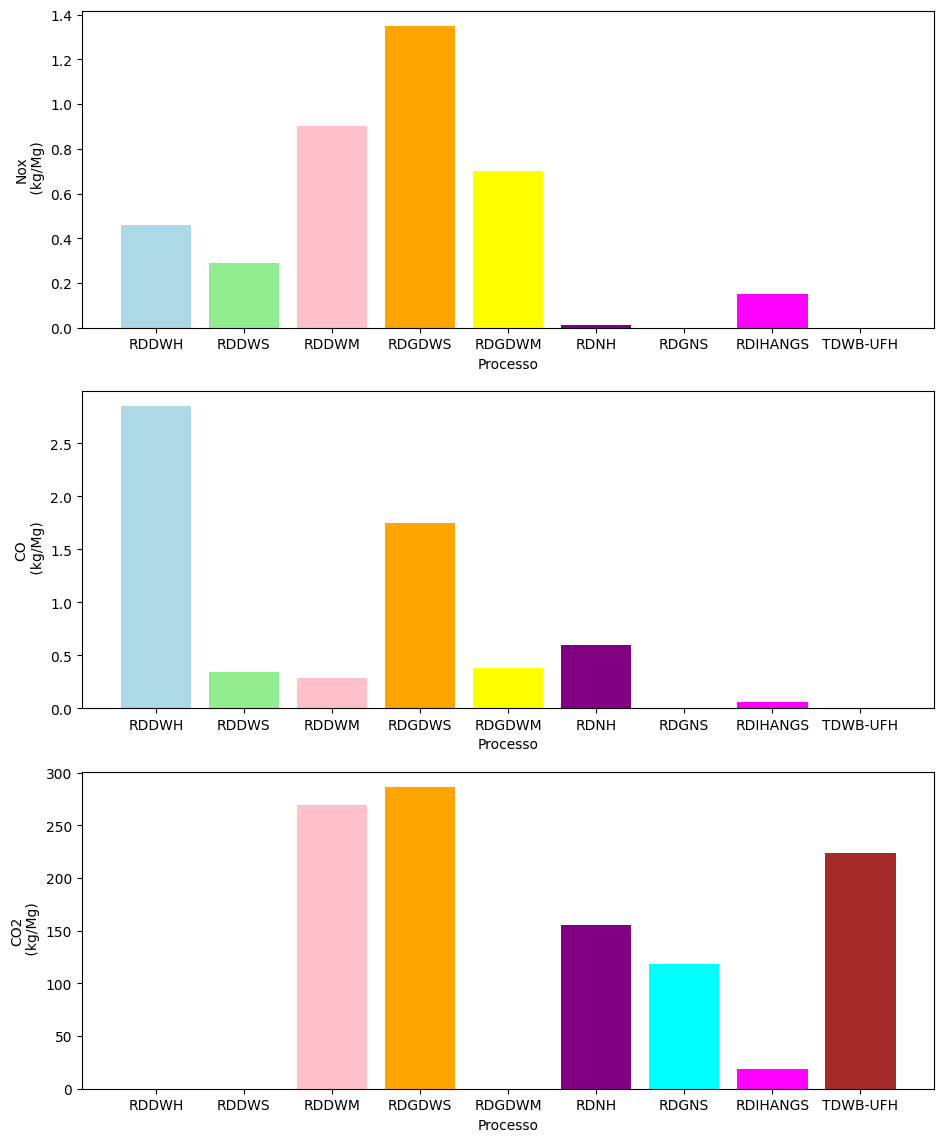

In [40]:
atv = 2022
Emissao = fe * atv
print(Emissao.sum())

# Criando os gráficos
fig, ax = plt.subplots(len(fe.columns) - 1, 1, figsize=(11, 14))

# Subplots com gráfico de barra
for ii in range(1, len(fe.columns)):
    print(ii)
    ax[ii - 1].bar(fe['Source'], fe.iloc[:, ii], color = ['lightblue', 'lightgreen', 'pink', 'orange', 'yellow', 'purple', 'cyan', 'magenta', 'brown'])
    ax[ii - 1].set_xlabel('Processo', fontsize=10)
    ax[ii - 1].set_ylabel(fe.columns[ii] + '\n (kg/Mg)', fontsize=10)

Observação: As siglas dos processos estão resumidas para melhor apresentação do gráfico, contudo podem ser verificadas na AP-42, capítulo 10_6_2.

Analisando os gráficos acima, a barra referente a RDGDWS (Rotary dryer, green,direct wood-fired) apresenta maior emissão.

## Taxa de Atividade Aleatória com Sazonalidade

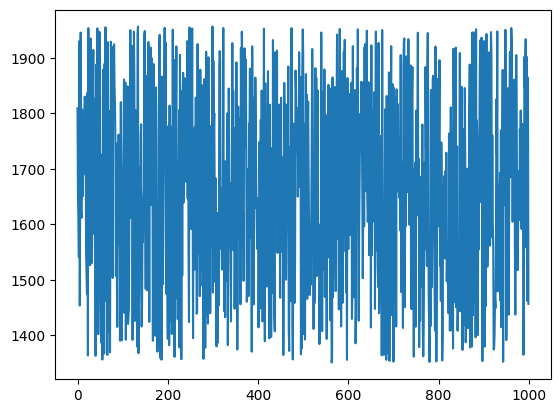

In [42]:
import numpy as np
import pandas as pd

# Definindo valores max e min para o vetor de valores aleatórios
atvMax = 1350 * 1.45
atvMin = 1350
n = 1000

# Inserindo vetor para valores aleatórios
atv = (atvMax - atvMin) * np.random.rand(n) + atvMin

# Gerando uma figura e plotando os valores aleatórios
fig, ax = plt.subplots()
ax.plot(atv)
plt.show()

## Criando Datas

In [43]:
datas = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

df = pd.DataFrame({'Data': datas})

df['Mês'] = df['Data'].dt.month
df['Dia do Ano'] = df['Data'].dt.dayofyear

# Mostrando o resultado
print(df)

          Data  Mês  Dia do Ano
0   2024-01-01    1           1
1   2024-01-02    1           2
2   2024-01-03    1           3
3   2024-01-04    1           4
4   2024-01-05    1           5
..         ...  ...         ...
361 2024-12-27   12         362
362 2024-12-28   12         363
363 2024-12-29   12         364
364 2024-12-30   12         365
365 2024-12-31   12         366

[366 rows x 3 columns]


In [44]:
# Retirando o número de linhas e datas
n = df.shape[0]

# Gerando atividade variada com base no vetor datas
atv = (atvMax - atvMin) * np.random.rand(n) + atvMin
df['Atividade'] = atv

# Mostrando o resultado obtido
print(df)

# Salvando em arquivo .csv
df.to_csv(r"C:\Users\alice\OneDrive\Área de Trabalho\UFSC 24.1\Poluicao\ENS51732401\tabelas\atv.csv", index=False)

          Data  Mês  Dia do Ano    Atividade
0   2024-01-01    1           1  1848.520617
1   2024-01-02    1           2  1820.655913
2   2024-01-03    1           3  1419.611105
3   2024-01-04    1           4  1859.526046
4   2024-01-05    1           5  1904.962833
..         ...  ...         ...          ...
361 2024-12-27   12         362  1656.213694
362 2024-12-28   12         363  1691.698611
363 2024-12-29   12         364  1649.992482
364 2024-12-30   12         365  1665.704926
365 2024-12-31   12         366  1514.605418

[366 rows x 4 columns]


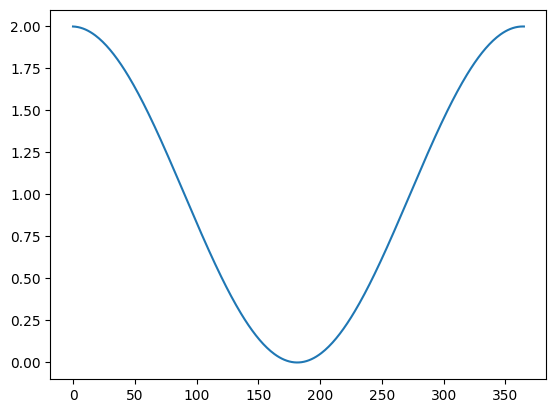

In [45]:
sazonalidade = np.cos((2 * np.pi) * df['Dia do Ano'] / 365) + 1  #comentario

# Inserindo a sazonalidade 
df['Sazonalidade'] = sazonalidade

# Plotando 
plt.plot(sazonalidade)
plt.show()

# Salvando em arquivo CSV
df.to_csv(r"C:\Users\alice\OneDrive\Área de Trabalho\UFSC 24.1\Poluicao\ENS51732401\tabelas\atv.csv", index=False)

501582.8654901389


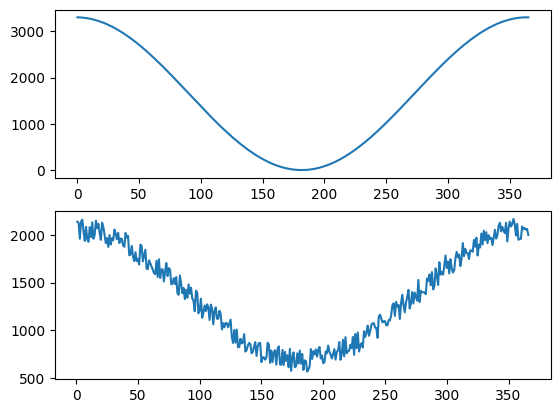

In [46]:
import numpy as np
import pandas as pd

# Criando valores variados com sazonalidade
n = df.shape[0]

# Gerando valores variados
aleatorio = (atvMax - atvMin) * np.random.rand(n) + atvMin
df['Aleatorio'] = aleatorio

# Calculando valores variados com sazonalidade
df['aleatorioSazonal'] = (df['Atividade'] + df['Sazonalidade'] * df['Atividade'].mean()) * 0.415

# Plotando os valores variados com sazonalidade
fig, ax = plt.subplots(2)
ax[0].plot(df['Sazonalidade'] * df['Atividade'].mean())
ax[1].plot(df['Dia do Ano'], df['aleatorioSazonal'])

# Cálculo da média anual dos valores variados com sazonalidade
print(df['aleatorioSazonal'].mean() * 365)

plt.show()

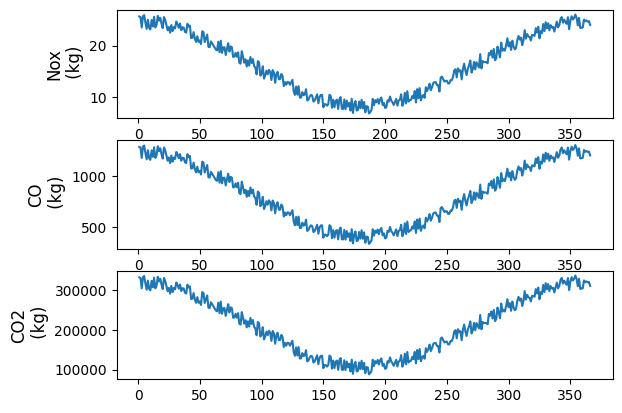

In [47]:
fig,ax= plt.subplots(3)

for ii in range (1,4):
    ax[ii-1].plot(df['Dia do Ano'], df['aleatorioSazonal']*fe.iloc[5,ii])
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n (kg)', fontsize = 12)

In [48]:
# Calcular a soma das emissões considerando todos os processos
labels = ['NOx', 'CO', 'CO2']
for ii, label in enumerate(labels, start=1):
    SomaFE = fe.iloc[:, ii].sum()
    print('Dados ', label)
    
    # Converter kg/dia para g/s
    soma_emissoes = df['aleatorioSazonal'].sum() * SomaFE * 1000 / (24 * 60 * 60)
    
    # Calcular a emissão média em g/s
    emissao_media = df['aleatorioSazonal'].mean() * SomaFE
    
    # Calcular a emissão mínima em g/s
    emissao_minima = df['aleatorioSazonal'].min() * SomaFE
    
    # Calcular a emissão máxima em g/s
    emissao_maxima = df['aleatorioSazonal'].max() * SomaFE

    #Mostrar os resultados obtidos
                                               
    print("Emissão mínima: {:.2f} g/s".format(emissao_minima))
    print("Emissão média: {:.2f} g/s".format(emissao_media))
    print("Emissão máxima: {:.2f} g/s".format(emissao_maxima))
    print("Soma das emissões: {:.2f} g/s".format(soma_emissoes)) 
    print(' ')

Dados  NOx
Emissão mínima: 2189.34 g/s
Emissão média: 5307.16 g/s
Emissão máxima: 8375.51 g/s
Soma das emissões: 22481.72 g/s
 
Dados  CO
Emissão mínima: 3554.42 g/s
Emissão média: 8616.23 g/s
Emissão máxima: 13597.74 g/s
Soma das emissões: 36499.31 g/s
 
Dados  CO2
Emissão mínima: 607766.42 g/s
Emissão média: 1473279.42 g/s
Emissão máxima: 2325061.44 g/s
Soma das emissões: 6240975.34 g/s
 


Analisando os valores médio, máximo e soma das emissões, destaca-se a Emissão de CO2, pois apresenta valores mais significativos.